In [1]:
from dateutil.parser import parse 
#import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns

#import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima.arima.utils import ndiffs

import json

In [16]:
#Get Mylist of tickers
with open('./includes/tickerList.json') as json_file:
    dctStockAll = json.load(json_file)

In [25]:
strlCols = ['Date','Close']
df_main = pd.DataFrame(columns=strlCols)
df_main.set_index('Date', drop=True, inplace=True)
for aKey in dctStockAll:
    #only indexes for now
    if aKey['tickerGroup'] == 'WorldIndex':
        strFile = './results/' + aKey['tickerName'] + '.csv'
        aDf = pd.read_csv(strFile)
        #aDf.reset_index('Date', drop=True, inplace=True)
        aDf = aDf[strlCols]
        aDf['Date'] = pd.to_datetime(aDf.Date)
        #aDf.head()
        strR_suf = '_' + aKey['tickerName']
        if df_main.empty:
           df_main = aDf.copy()
        else:
            #df_main = df_main.join(aDf,on='Date',how='left', rsuffix=strR_suf)
            df_main = df_main.merge(aDf,how='outer', on='Date', suffixes=('',strR_suf))

In [26]:
    df_main.head()

,Date,Close,Close_^HSI,Close_^N300,Close_IMOEX.ME,Close_^GDAXI,Close_^FTSE,Close_^KS11,Close_JSE.JO
0,1950-01-03,16.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-04,16.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-05,16.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-06,16.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-09,17.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


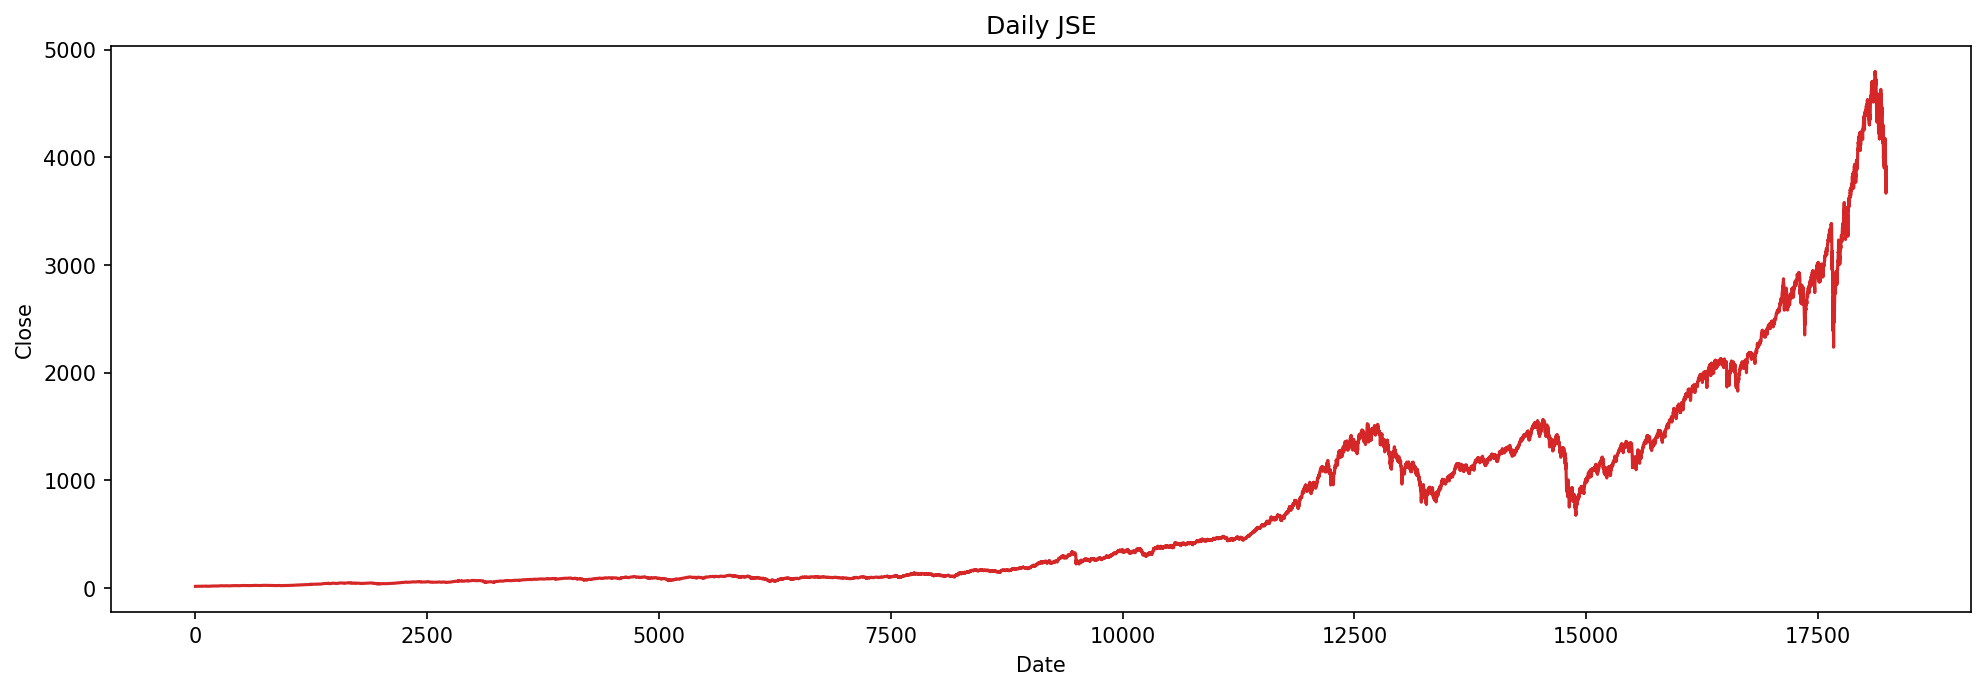

In [27]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Close', dpi=150):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_main, x=df_main.index, y=df_main.Close, title='S&P 500') 



In [29]:
result = adfuller(df_main.Close.dropna())
print('NumDiffs: %f' % ndiffs(df_main.Close.dropna(), test='adf'))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

NumDiffs: 1.000000
ADF Statistic: 2.716697
p-value: 0.999088


/Users/gauchetvanantwerpen/Documents/01 gvaLokaalDocs/01 Pers/02 Nisse/02 development/02 nissedb/venv/lib/python3.8/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


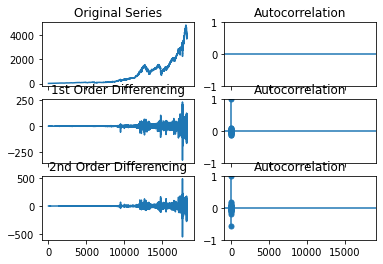

In [31]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_main.Close.dropna()); axes[0, 0].set_title('Original Series')
plot_acf(df_main.Close, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(df_main.Close.dropna().diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_main.Close.dropna().diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_main.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_main.Close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

/Users/gauchetvanantwerpen/Documents/01 gvaLokaalDocs/01 Pers/02 Nisse/02 development/02 nissedb/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


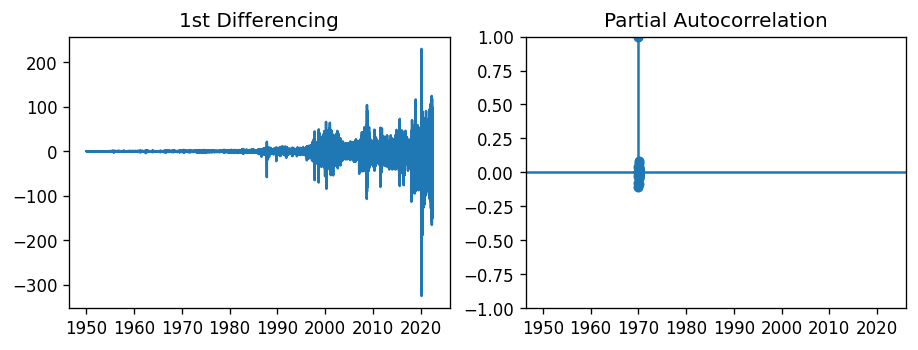

In [6]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.Close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Close.diff().dropna(), ax=axes[1])

plt.show()